# Compute the token length of ACE dataset

In [1]:
import json
from transformers import LlamaTokenizer

In [2]:
dataset_path = "/gscratch4/users/osainz006/CoLLIE/data/processed/train.code.jsonl"

In [3]:
tokenizer = LlamaTokenizer.from_pretrained("/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/65B/")
tokenizer.pad_token_id = tokenizer.eos_token_id

In [42]:
with open(dataset_path, "r",encoding="utf8") as f:
    data = [json.loads(line.strip()) for line in f.readlines()]
    data = [x["text"] for x in data if len(x["labels"])>0 and x["task_id"]]#=="ACE05_RE"]

print(f"Number of samples: {len(data)}")

Number of samples: 23301


In [43]:
from rich.progress import Progress, TimeElapsedColumn, SpinnerColumn
from typing import List
import math

In [44]:
lens:List[int] = []
batch_size = 100
with Progress(
                SpinnerColumn(),
                *Progress.get_default_columns(),
                TimeElapsedColumn(),
                ) as progress:
    
    task = progress.add_task(
                        f"[cyan]Tokenizing data",
                        total=len(data),
                    )
    
    for i in range(0,len(data),batch_size):
        batch_len = [len(x) for x in tokenizer(
                data[i:i+batch_size],
                return_tensors=None,
                padding=False,
                truncation=False,
                add_special_tokens=True)["input_ids"]
            ]
        lens.extend(batch_len)
        
        progress.update(task,advance=len(batch_len))


Output()

In [45]:
print(f"Number of samples: {len(lens)}. Max len: {max(lens)}. Min len: {min(lens)}. Avg len: {sum(lens)//len(lens)}")

Number of samples: 23301. Max len: 1476. Min len: 148. Avg len: 503


In [46]:
import matplotlib.pyplot as plt

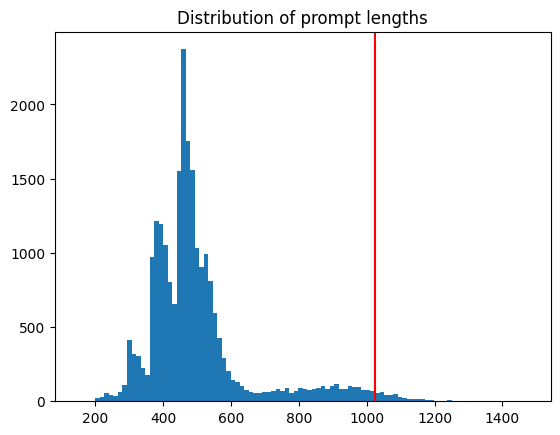

In [47]:
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(1024, color="red")

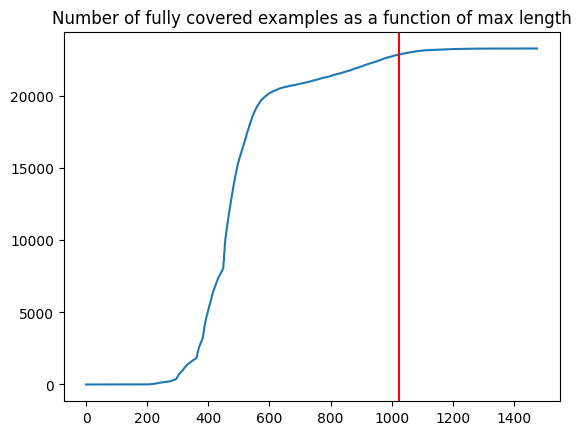

In [48]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=1024, color="red")